**Note:** The paper we're replicating (the source of the dataset that we'll be using) is available here: 

https://arxiv.org/abs/1710.06071

The model's architecture which has been used in the paper we're replicating can be viewed from here:

https://arxiv.org/abs/1612.05251

## Get data

We will use the authors' github to downlaod the data. 

Link: https://github.com/Franck-Dernoncourt/pubmed-rct

In [ ]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct
!ls pubmed-rct 

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 0), reused 0 (delta 0), pack-reused 30
Unpacking objects: 100% (33/33), done.
PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [ ]:
# Check what files are in the PubMed_20K dataset

!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

dev.txt  test.txt  train.txt


In [ ]:
# Start our experiments using the 20k dataset with numbers replaced by "@" sign 

data_dir = "/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign"

In [ ]:
# Check all of the filenames in the target directory

import os

filenames = [data_dir + "/" + filename for filename in os.listdir(data_dir)]
filenames

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt']

## Preprocess data



In [ ]:
# Create a fucntion to read the lines of a document 

def get_lines(filename):
  """
  Reads a text filename and returns the lines of text as list.
  Args:
    filename: a string containing the filepath.
  Returns:
    A list of strings with one string per line from the target filename.
  """
  with open(filename, "r") as f:
    return f.readlines()

In [ ]:
# Read in the training text's lines

train_lines = get_lines("/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt")
train_lines[:45]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [ ]:
len(train_lines)

210040

## Structuring the Data

We can represent our data in the form of list of dictionaries like below:

[{'line_number':3,
  
  'target':'METHODS',

  'text':'Pain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
  
  'total_lines':11(0 dan başlayarak)},

  {...(next sentence in the same structure)...}]


In [ ]:
def data_preprocess(filename):
  file_lines = get_lines(filename)
  line_counter = 1
  index = 0
  preprocessed_data = []

  for line in file_lines:
    if line[0]=="#":
      continue

    else:
      if line != "\n":
        target, text = line.split("\t")
        preprocessed_data.append({"line_number":line_counter-1,
                                  "target":target,
                                  "text":text})
        line_counter += 1

      else:
        total = index + line_counter
        for i in range(index, total-1):
          preprocessed_data[i]["total_lines"] = line_counter-2
        index = total-1
        line_counter = 1
        continue
  for i in preprocessed_data:
    i["text"] = i["text"][:-1]
  return preprocessed_data

In [ ]:
train_samples = data_preprocess("/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt")
val_samples = data_preprocess("/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt")
test_samples = data_preprocess("/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt")

print(len(train_samples), len(val_samples), len(test_samples))

180040 30212 30135


In [ ]:
train_samples[:5]

[{'line_number': 0,
  'target': 'OBJECTIVE',
  'text': 'To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .',
  'total_lines': 11},
 {'line_number': 1,
  'target': 'METHODS',
  'text': 'A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'total_lines': 11},
 {'line_number': 2,
  'target': 'METHODS',
  'text': 'Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'total_lines': 11},
 {'line_number': 3,
  'target': 'METHODS',
  'text': 'Pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'total_lines': 11},
 {'line_number': 4,
  'target': 'METHODS',
  'text': 'Secondary outcome measures include

## Turning preprocessed data into a DataFrame to further visualize it

In [ ]:
import pandas as pd

In [ ]:
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)

train_df.head(14)

,line_number,target,text,total_lines
0,0,OBJECTIVE,To investigate the efficacy of @ weeks of dail...,11
1,1,METHODS,A total of @ patients with primary knee OA wer...,11
2,2,METHODS,Outcome measures included pain reduction and i...,11
3,3,METHODS,Pain was assessed using the visual analog pain...,11
4,4,METHODS,Secondary outcome measures included the Wester...,11
5,5,METHODS,"Serum levels of interleukin @ ( IL-@ ) , IL-@ ...",11
6,6,RESULTS,There was a clinically relevant reduction in t...,11
7,7,RESULTS,The mean difference between treatment arms ( @...,11
8,8,RESULTS,"Further , there was a clinically relevant redu...",11
9,9,RESULTS,These differences remained significant at @ we...,11


In [ ]:
# Distribution of labels in train data
train_df.target.value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

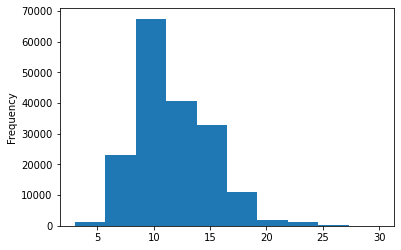

In [ ]:
# Check the length of different total_lines
train_df.total_lines.plot.hist()

### Get lists of sentences

In [ ]:
# Convert abstract text lines into lists

train_sentences = train_df["text"].to_list()
val_sentences = val_df["text"].to_list()
test_sentences = test_df["text"].to_list()

train_sentences[:10]

['To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .',
 'A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'Pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'Secondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .',
 'Serum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP ) were measured .',
 'There was a clinic

## Make numeric labels

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# One hot encode labels

one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1,1))
val_labels_one_hot = one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1,1)) 
test_labels_one_hot = one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1,1))

train_labels_one_hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
# Label encode labels
# Extract labels ("target" columns) and encode them into integers
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.transform(val_df["target"].to_numpy())
test_labels_encoded = label_encoder.transform(test_df["target"].to_numpy())

train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [ ]:
# Get class names and number of classes from Label Encoder instance
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_

num_classes, class_names

(5, array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

# Model 0: Baseline model TF-IDF Multinomial Naive Bayes classifier 

tfidf vectorizer link: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import sklearn

In [ ]:
model_0 = Pipeline([
  ("tfidf", TfidfVectorizer()),
  ("clf", MultinomialNB())
])

In [ ]:
model_0.fit(train_sentences,
            train_labels_encoded)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
model_0_score = model_0.score(val_sentences, val_labels_encoded)
model_0_score

0.7218323844829869

In [ ]:
model_0_preds = model_0.predict(val_sentences)
model_0_preds[:10]

array([4, 1, 3, 2, 2, 2, 2, 2, 4, 4])

### Importing the helper functions

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-09-08 16:37:16--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-09-08 16:37:16 (98.3 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import calculate_results

In [ ]:
# Calculate baseline results
model_0_results = calculate_results(val_labels_encoded, model_0_preds)
model_0_results

{'accuracy': 72.1832384482987,
 'f1': 0.6989250353450294,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869}

# Model 1: Conv1D

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# How long is each sentence on average
sent_lens = [len(sentences.split()) for sentences in train_sentences]
mean_lens = np.mean(sent_lens)
mean_lens

26.338269273494777

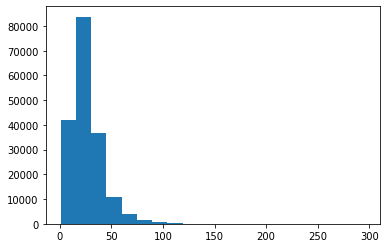

In [ ]:
# What is the distribution of lengths look like?

plt.hist(sent_lens, bins=20);

numpy.percentile()

link: https://numpy.org/doc/stable/reference/generated/numpy.percentile.html

In [ ]:
# How long of a sentence length covers 95% of examples?

output_seq_length = int(np.percentile(sent_lens, 95))
output_seq_length

55

In [ ]:
# Maximum sequence length in the training set
np.max(sent_lens)

296

### Creating text vectorizer

tf.keras.layers.experimental.preprocessing.TextVectorization

link: https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization

In [ ]:
# How many word are in our vocabulary?
# Note: We can find that number in this paper (https://arxiv.org/abs/1710.06071) in 3rd page on the top right (table:2) and it says there are 68k vocabs in PubMed 20k

max_tokens = 68000

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [ ]:
text_vectorizer = TextVectorization(max_tokens=max_tokens,
                                    output_sequence_length=output_seq_length,
                                    pad_to_max_tokens=True)

In [ ]:
# Adapt text vectorizer to training sentences

text_vectorizer.adapt(train_sentences)

In [ ]:
# Test out text vectorizer on random sentences
import random

random_sentence = random.choice(train_sentences)
print(f"Text:\n{random_sentence}")
print(f"\nLength of the text: {len(random_sentence.split())}")
print(f"\nVectorized text:\n{text_vectorizer([random_sentence])}")

Text:
True saturations were displayed outside this range .

Length of the text: 8

Vectorized text:
[[ 3431 14489     9  2932  3076    23   283     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]


In [ ]:
# How many words in our training vocabulary?
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
print(f"Number of words in vocab: {len(rct_20k_text_vocab)}")
print(f"Most common words in the vocab: {rct_20k_text_vocab[:5]}")
print(f"Least common words: {rct_20k_text_vocab[-5:]}")

Number of words in vocab: 64841
Most common words in the vocab: ['', '[UNK]', 'the', 'and', 'of']
Least common words: ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [ ]:
# Get the config of our text vectorizer
text_vectorizer.get_config()

{'batch_input_shape': (None,),
 'dtype': 'string',
 'max_tokens': 68000,
 'name': 'text_vectorization',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': True,
 'split': 'whitespace',
 'standardize': 'lower_and_strip_punctuation',
 'trainable': True}

### Creating embedding layer

In [ ]:
# Creating an embedding layer
embedding = tf.keras.layers.Embedding(input_dim=len(rct_20k_text_vocab),
                                      output_dim=128)

In [ ]:
# Show example embedding

print(f"Sentence before vectorization:\n{random_sentence}\n")
vectorized_text = text_vectorizer([random_sentence])
print(f"Sentence after vectorization:\n{vectorized_text}\n")
embedded_text = embedding(vectorized_text)
print(f"Sentence after embedding:\n{embedded_text}")
print(f"Embedded sentence shape:{embedded_text.shape}")

Sentence before vectorization:
True saturations were displayed outside this range .

Sentence after vectorization:
[[ 3431 14489     9  2932  3076    23   283     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]

Sentence after embedding:
[[[ 0.03186205 -0.0131906  -0.04807918 ... -0.00353005 -0.01071843
    0.00585896]
  [ 0.04310857 -0.00633787  0.02732817 ... -0.00388549 -0.01205214
    0.03100646]
  [-0.04891852  0.02131588  0.02333453 ... -0.00428479  0.00723534
   -0.03755289]
  ...
  [ 0.02198962 -0.02321467 -0.04148889 ... -0.0205623   0.04902743
    0.01492611]
  [ 0.02198962 -0.02321467 -0.04148889 ... -0.0205623   0.04902743
    0.01492611]
  [ 0.02198962 -0.02321467 -0.04148889 ... -0.0205623   0.04902743
    0.01492611]]]
Embedded s

## Creating datasets (making sure our data loads as fast as possible) 

We are going to set up our data to run as fast as possible with the TensorFlow tf.data API. Many of the steps here are discussed at length in these two resources:

https://www.tensorflow.org/guide/data_performance

https://www.tensorflow.org/guide/data

In [ ]:
# Turn our data into TensorFlow Datasets

train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
val_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

train_dataset

<TensorSliceDataset shapes: ((), (5,)), types: (tf.string, tf.float64)>

In [ ]:
# Take the TensorSliceDatasets and turn them into prefetched datasets

train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<PrefetchDataset shapes: ((None,), (None, 5)), types: (tf.string, tf.float64)>

### Creating model

In [ ]:
inputs = tf.keras.layers.Input(shape=(1,), dtype="string")

x = text_vectorizer(inputs)

x = embedding(x)

x = tf.keras.layers.Conv1D(64, 5, padding="same", activation="relu")(x)

x = tf.keras.layers.GlobalAveragePooling1D()(x)

x = tf.keras.layers.Dense(5)(x)

outputs = tf.keras.layers.Activation(activation="softmax", dtype="float32")(x)

model_1 = tf.keras.models.Model(inputs, outputs)

In [ ]:
model_1.compile(loss = tf.keras.losses.categorical_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
model_1_history = model_1.fit(train_dataset,
                              steps_per_epoch = int(0.1*len(train_dataset)),
                              epochs = 3,
                              validation_data = val_dataset,
                              validation_steps = int(0.1*len(val_dataset)))

Epoch 1/3
562/562 [==============================] - 37s 14ms/step - loss: 0.9230 - accuracy: 0.6321 - val_loss: 0.6826 - val_accuracy: 0.7417
Epoch 2/3
562/562 [==============================] - 8s 14ms/step - loss: 0.6581 - accuracy: 0.7556 - val_loss: 0.6296 - val_accuracy: 0.7703
Epoch 3/3
562/562 [==============================] - 8s 14ms/step - loss: 0.6191 - accuracy: 0.7734 - val_loss: 0.5977 - val_accuracy: 0.7849


In [ ]:
model_1.evaluate(val_dataset)

945/945 [==============================] - 4s 5ms/step - loss: 0.6002 - accuracy: 0.7844


[0.6002038717269897, 0.7843571901321411]

In [ ]:
model_1_pred_probs = model_1.predict(val_dataset)
model_1_pred_probs[:10]

array([[4.06640410e-01, 1.76725253e-01, 9.71034765e-02, 2.90494949e-01,
        2.90359054e-02],
       [4.61926013e-01, 2.63126373e-01, 1.45377023e-02, 2.52151459e-01,
        8.25846475e-03],
       [1.37086943e-01, 5.32373507e-03, 1.58972922e-03, 8.55942965e-01,
        5.66320159e-05],
       [8.63365130e-06, 1.85782032e-04, 9.86988902e-01, 8.13290990e-06,
        1.28086424e-02],
       [1.28070673e-03, 4.44284491e-02, 4.02122259e-01, 9.96979768e-04,
        5.51171660e-01],
       [1.84850637e-02, 3.36689018e-02, 5.57233930e-01, 8.33676755e-03,
        3.82275283e-01],
       [3.44194617e-04, 4.06012591e-03, 2.26771429e-01, 1.71476961e-04,
        7.68652737e-01],
       [3.02883573e-02, 3.12767886e-02, 6.64498508e-01, 1.51434643e-02,
        2.58792907e-01],
       [1.22231137e-13, 2.29011370e-08, 1.14965800e-07, 1.00513714e-13,
        9.99999881e-01],
       [8.11164547e-03, 6.41682744e-01, 5.00250086e-02, 1.59398392e-02,
        2.84240842e-01]], dtype=float32)

In [ ]:
model_1_preds = tf.argmax(model_1_pred_probs, axis=1)
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 3, 2, 4, 2, 4, 2, 4, 1])>

In [ ]:
model_1_results = calculate_results(val_labels_encoded, model_1_preds)
model_1_results

{'accuracy': 78.43572090560042,
 'f1': 0.781845262889685,
 'precision': 0.7813712897710083,
 'recall': 0.7843572090560043}

In [ ]:
model_0_results

{'accuracy': 72.1832384482987,
 'f1': 0.6989250353450294,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869}

# Model 2: A model with a pretrained embedding layer

In the paper, they have used GloVe's pretrained embeddings, but we are going to use USE (Universial Sentence Encoder) (2021) which is a more modern one as GloVe (2014) is relatively old.

How to use GloVe embeddings: https://keras.io/examples/nlp/pretrained_word_embeddings/

USE: https://tfhub.dev/google/universal-sentence-encoder/4

In [ ]:
import tensorflow_hub as hub

In [ ]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [ ]:
pretrained_embedding_layer = hub.KerasLayer(embed,
                                            trainable=False,
                                            input_shape=[],
                                            name="USE")

In [ ]:
# Test out the pretrained embedding on a random sentence

random_train_sentence = random.choice(train_sentences)
print(f"Text:\n{random_train_sentence}\n")
use_embedded_sentence = pretrained_embedding_layer([random_train_sentence])
print(f"Embedded sentence:\n{use_embedded_sentence[0][:30]}")
print(f"\nLength of sentence embedding: {len(use_embedded_sentence[0])}")

Text:
A tailored nurse-led programme of skin protection counselling may be recommended as an essential part of hand eczema treatment .

Embedded sentence:
[-0.00861393  0.05070186 -0.00623368  0.01944415 -0.01662781  0.02013292
 -0.04434866 -0.03059979  0.07904372  0.01353157  0.08109165  0.00541238
 -0.0449623   0.05007496  0.03959624  0.0585025  -0.08458751 -0.03034051
 -0.0514166  -0.02055047 -0.05859632  0.06001669  0.04435125 -0.05283939
  0.03434773 -0.05852787 -0.04921748 -0.02802649  0.06948271  0.0103136 ]

Length of sentence embedding: 512


In [ ]:
inputs = tf.keras.layers.Input(shape=[], name="Input", dtype=tf.string)

x = pretrained_embedding_layer(inputs)

x = tf.keras.layers.Dense(128, activation="relu")(x)

outputs = tf.keras.layers.Dense(5, activation="softmax")(x)

model_2 = tf.keras.models.Model(inputs, outputs)

In [ ]:
model_2.compile(loss = tf.keras.losses.categorical_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
model_2_history = model_2.fit(train_dataset,
                              epochs = 3,
                              steps_per_epoch = int(0.1*len(train_dataset)),
                              validation_data = val_dataset,
                              validation_steps = int(0.1*len(val_dataset)))

Epoch 1/3
562/562 [==============================] - 14s 21ms/step - loss: 0.9184 - accuracy: 0.6491 - val_loss: 0.7984 - val_accuracy: 0.6902
Epoch 2/3
562/562 [==============================] - 11s 20ms/step - loss: 0.7700 - accuracy: 0.7011 - val_loss: 0.7560 - val_accuracy: 0.7041
Epoch 3/3
562/562 [==============================] - 11s 20ms/step - loss: 0.7546 - accuracy: 0.7103 - val_loss: 0.7404 - val_accuracy: 0.7114


In [ ]:
model_2.evaluate(val_dataset)

945/945 [==============================] - 16s 17ms/step - loss: 0.7429 - accuracy: 0.7134


[0.7428788542747498, 0.7133920192718506]

In [ ]:
model_2_pred_probs = model_2.predict(val_dataset)
model_2_pred_probs[:5]

array([[0.42493978, 0.35645312, 0.00209373, 0.20997775, 0.00653568],
       [0.34059548, 0.51831317, 0.0027866 , 0.13611086, 0.00219388],
       [0.22970888, 0.15291263, 0.01811896, 0.5637119 , 0.03554756],
       [0.01143182, 0.0472405 , 0.83560836, 0.00818312, 0.09753617],
       [0.0313319 , 0.2370913 , 0.23011471, 0.0156369 , 0.4858251 ]],
      dtype=float32)

In [ ]:
model_2_preds = tf.argmax(model_2_pred_probs, axis=1)
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 1, 3, 2, 4, 2, 2, 2, 4, 1])>

In [ ]:
model_2_results = calculate_results(val_labels_encoded, model_2_preds)
model_2_results

{'accuracy': 71.33920296570899,
 'f1': 0.7102810275596301,
 'precision': 0.7137384873242348,
 'recall': 0.7133920296570899}

In [ ]:
model_1_results

{'accuracy': 78.43572090560042,
 'f1': 0.781845262889685,
 'precision': 0.7813712897710083,
 'recall': 0.7843572090560043}

# Model 3: Conv1D with character embeddings

### Creating character level tokanizer

In [ ]:
train_sentences[:10]

['To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .',
 'A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'Pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'Secondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .',
 'Serum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP ) were measured .',
 'There was a clinic

In [ ]:
# Make function to split sentences into characters

def split_chars(text):
  return " ".join(list(text))

# Text splitting non-character-level sequence into character
split_chars(random_train_sentence)

'A   t a i l o r e d   n u r s e - l e d   p r o g r a m m e   o f   s k i n   p r o t e c t i o n   c o u n s e l l i n g   m a y   b e   r e c o m m e n d e d   a s   a n   e s s e n t i a l   p a r t   o f   h a n d   e c z e m a   t r e a t m e n t   .'

In [ ]:
# Example
x = " ".join(list(train_sentences[0]))
x

'T o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   O A   )   .'

In [ ]:
# Split sequence-level data splits into character-level data splits

train_chars = [split_chars(sequence) for sequence in train_sentences]
val_chars = [split_chars(sequence) for sequence in val_sentences]
test_chars = [split_chars(sequence) for sequence in test_sentences]

train_chars[:5]

['T o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   O A   )   .',
 'A   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   O A   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .',
 'O u t c o m e   m e a s u r e s   i n c l u d e d   p a i n   r e d u c t i o n   a n d   i m p r o v e m e n t   i n   f u n c t i o n   s c o r e s   a 

In [ ]:
# What's the average character length?

char_lens = [len(sentence) for sentence in train_sentences]
mean_char_len = np.mean(char_lens)
mean_char_len

149.3662574983337

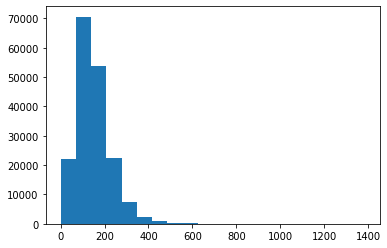

In [ ]:
# Check the distribution of our sequences at a character-level

plt.hist(char_lens, bins=20);

In [ ]:
# Find what character length covers 95% of sequences
output_seq_char_len = int(np.percentile(char_lens, 95))
output_seq_char_len

290

In [ ]:
# Get all keyboard characters
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet, len(alphabet)

('abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~', 68)

In [ ]:
# Create char-level token vectorizer instance
NUM_CHAR_TOKENS = len(alphabet)+2 #add 2 for space and OOV(out of vocabulary, '[UNK]') token

char_vectorizer = TextVectorization(max_tokens=NUM_CHAR_TOKENS,
                                    output_sequence_length=output_seq_char_len,
                                    pad_to_max_tokens=True,
                                    name="char_vectorizer")

In [ ]:
# Adapt character vectorizer to training characters
char_vectorizer.adapt(train_chars)

In [ ]:
# Check character vocab stats
char_vocab = char_vectorizer.get_vocabulary()
print(f"Number of different characters in character vocab:{len(char_vocab)}")
print(f"\n5 most common characters:\n{char_vocab[:5]}\n")
print(f"5 least common characters:\n{char_vocab[-5:]}")

Number of different characters in character vocab:28

5 most common characters:
['', '[UNK]', 'e', 't', 'i']

5 least common characters:
['k', 'x', 'z', 'q', 'j']


In [ ]:
# Test out character vectorizer
random_train_chars = random.choice(train_chars)
print(f"Charified text:\n{random_train_chars}\n")
print(f"Length of random train chars:{len(random_train_chars.split())}\n")
vectorized_chars = char_vectorizer([random_train_chars])
print(f"Vectorized chars:\n{vectorized_chars}")
print(f"\nLength of vectorized chars:{len(vectorized_chars[0])}")

Charified text:
T h e   i n c i d e n c e   o f   p o s t o p e r a t i v e   d e l i r i u m   a n d   o t h e r   c o m p l i c a t i o n s   w e r e   e v a l u a t e d   .

Length of random train chars:70

Vectorized chars:
[[ 3 13  2  4  6 11  4 10  2  6 11  2  7 17 14  7  9  3  7 14  2  8  5  3
   4 21  2 10  2 12  4  8  4 16 15  5  6 10  7  3 13  2  8 11  7 15 14 12
   4 11  5  3  4  7  6  9 20  2  8  2  2 21  5 12 16  5  3  2 10  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0 

### Creating a character-level embedding layer

In [ ]:
char_embed = tf.keras.layers.Embedding(input_dim=len(char_vocab),
                                       output_dim=25, 
                                       name="char_embed")

In [ ]:
embedded_sentence = embedding(vectorized_chars)
embedded_sentence

<tf.Tensor: shape=(1, 290, 128), dtype=float32, numpy=
array([[[-0.01101205,  0.01624993,  0.03575674, ..., -0.06817233,
          0.00626766,  0.01709842],
        [ 0.17348945, -0.14712223,  0.0883676 , ..., -0.06093431,
          0.0983879 ,  0.05165663],
        [-0.02998652, -0.02064937, -0.01293472, ...,  0.06996574,
         -0.02751221,  0.02066758],
        ...,
        [ 0.00118977, -0.01986329, -0.0356791 , ...,  0.01508699,
          0.0473071 , -0.00466877],
        [ 0.00118977, -0.01986329, -0.0356791 , ...,  0.01508699,
          0.0473071 , -0.00466877],
        [ 0.00118977, -0.01986329, -0.0356791 , ...,  0.01508699,
          0.0473071 , -0.00466877]]], dtype=float32)>

In [ ]:
train_chars_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot))
val_chars_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot))
test_chars_dataset = tf.data.Dataset.from_tensor_slices((test_chars, test_labels_one_hot))

In [ ]:
train_chars_dataset = train_chars_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_chars_dataset = val_chars_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_chars_dataset = test_chars_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
inputs = tf.keras.layers.Input(shape=(1,), dtype="string")

x = char_vectorizer(inputs)

x = char_embed(x)

x = tf.keras.layers.Conv1D(64,5,padding="same",activation="relu")(x)

x = tf.keras.layers.GlobalMaxPooling1D()(x)

outputs = tf.keras.layers.Dense(5,activation="softmax")(x)

model_3 = tf.keras.Model(inputs, outputs)

In [ ]:
model_3.compile(loss = tf.keras.losses.categorical_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
model_3_history = model_3.fit(train_chars_dataset,
                              epochs = 3,
                              steps_per_epoch = int(0.1*len(train_chars_dataset)),
                              validation_data = val_chars_dataset,
                              validation_steps = int(0.1*len(val_chars_dataset)))

Epoch 1/3
562/562 [==============================] - 6s 10ms/step - loss: 1.2699 - accuracy: 0.4791 - val_loss: 1.0611 - val_accuracy: 0.5761
Epoch 2/3
562/562 [==============================] - 6s 10ms/step - loss: 1.0116 - accuracy: 0.5989 - val_loss: 0.9528 - val_accuracy: 0.6240
Epoch 3/3
562/562 [==============================] - 6s 10ms/step - loss: 0.9300 - accuracy: 0.6332 - val_loss: 0.8736 - val_accuracy: 0.6642


In [ ]:
model_3_pred_probs = model_3.predict(val_chars_dataset)
model_3_pred_probs[:5]

array([[0.12422625, 0.18289353, 0.27224258, 0.31404606, 0.10659159],
       [0.25762945, 0.43226522, 0.02080531, 0.20110092, 0.08819912],
       [0.08427183, 0.31772843, 0.22220199, 0.2035846 , 0.17221317],
       [0.00909023, 0.02357294, 0.88827926, 0.02652667, 0.05253091],
       [0.01413433, 0.09485742, 0.5018906 , 0.05335035, 0.33576727]],
      dtype=float32)

In [ ]:
model_3_preds = tf.argmax(model_3_pred_probs, axis=1)
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([3, 1, 1, 2, 2, 2, 2, 1, 4, 4])>

In [ ]:
model_3_results = calculate_results(val_labels_encoded, model_3_preds)
model_3_results

{'accuracy': 65.76856878061697,
 'f1': 0.6473945761571668,
 'precision': 0.6512531759162689,
 'recall': 0.6576856878061698}

In [ ]:
model_0_results

{'accuracy': 72.1832384482987,
 'f1': 0.6989250353450294,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869}

# Model 4: Combining pretrained token embeddings + character embeddings (hybrid embedding layer)

(268. video)

**tf.keras.layers.Concatenate()**

link: https://tensorflow.google.cn/api_docs/python/tf/keras/layers/Concatenate?hl=zh-cn


Aşağıdaki linkte de biraz aşağı inince multi input model'ın functional API ile nasıl oluşturulacağının bir örneği var.

link: https://www.pyimagesearch.com/2019/02/04/keras-multiple-inputs-and-mixed-data/

In [ ]:
token_inputs = tf.keras.layers.Input(shape=[], dtype="string", name="token_input")
embedded_tokens = pretrained_embedding_layer(token_inputs)
token_output = tf.keras.layers.Dense(128, activation="relu")(embedded_tokens)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_output)


char_inputs = tf.keras.layers.Input(shape=(1,), dtype="string", name="char_input")
vectorized_characters = char_vectorizer(char_inputs)
embedded_chars = char_embed(vectorized_characters)
char_bi_lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(24))(embedded_chars) # bi-LSTM shown in Figure 1 of "https://arxiv.org/pdf/1612.05251.pdf"
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

# Concatenate token and char inputs (create hybrid token embedding)
token_char_concat = tf.keras.layers.Concatenate(name="token_char_hybrid")([token_model.output,
                                                                           char_model.output])


# Create output layers - adding in Dropout, discussed in seciton 4.2 of https://arxiv.org/pdf/1612.05251.pdf
combined_dropout = tf.keras.layers.Dropout(0.5)(token_char_concat)
combined_dense = tf.keras.layers.Dense(128, activation="relu")(combined_dropout)
final_dropout = tf.keras.layers.Dropout(0.5)(combined_dense)
output_layer = tf.keras.layers.Dense(5, activation="softmax")(final_dropout)

# Construct model with char and token inputs
model_4 = tf.keras.Model(inputs=[token_model.input, char_model.input],
                         outputs=output_layer,
                         name="model_4_token_and_char_embeddings")

In [ ]:
model_4.summary()

Model: "model_4_token_and_char_embeddings"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
char_input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
token_input (InputLayer)        [(None,)]            0                                            
__________________________________________________________________________________________________
char_vectorizer (TextVectorizat (None, 290)          0           char_input[0][0]                 
__________________________________________________________________________________________________
USE (KerasLayer)                (None, 512)          256797824   token_input[0][0]                
__________________________________________________________________

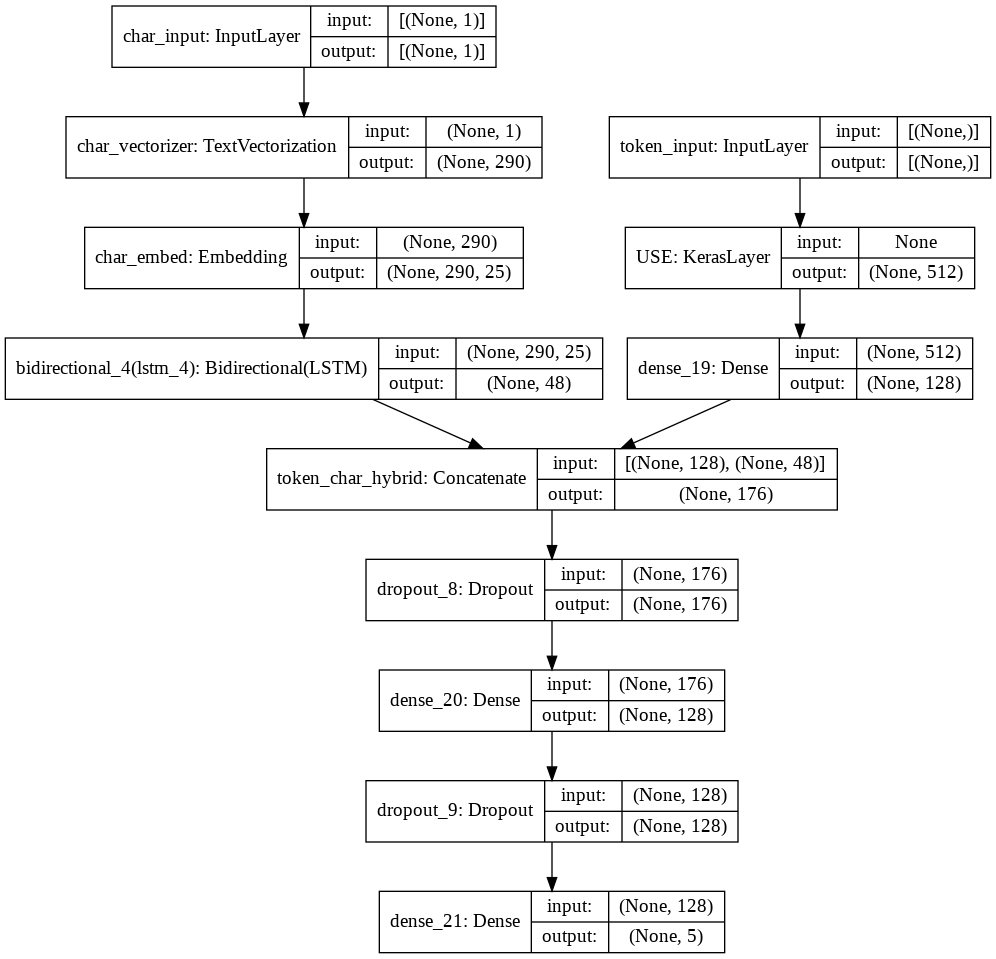

In [ ]:
# Plot hybrid token and character model
from tensorflow.keras.utils import plot_model
plot_model(model_4, show_shapes=True)

In [ ]:
# Compile token char model
model_4.compile(loss = tf.keras.losses.categorical_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

### Creating performant datasets with multiple inputs

In [ ]:
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars)) # make data
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # make labels
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data, train_char_token_labels)) # combine data and labels
train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # batching and prefetching

val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars)) 
val_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data, val_char_token_labels)) 
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) 

test_char_token_data = tf.data.Dataset.from_tensor_slices((test_sentences, test_chars)) 
test_char_token_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_char_token_dataset = tf.data.Dataset.zip((test_char_token_data, test_char_token_labels)) 
test_char_token_dataset = test_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) 

In [ ]:
# Check out our training char and token embedding dataset
train_char_token_dataset, val_char_token_dataset

(<PrefetchDataset shapes: (((None,), (None,)), (None, 5)), types: ((tf.string, tf.string), tf.float64)>,
 <PrefetchDataset shapes: (((None,), (None,)), (None, 5)), types: ((tf.string, tf.string), tf.float64)>)

### Fitting model_4

In [ ]:
model_4_history = model_4.fit(train_char_token_dataset,
                              epochs = 3,
                              steps_per_epoch = int(0.1*len(train_char_token_dataset)),
                              validation_data = val_char_token_dataset,
                              validation_steps = int(0.1*len(val_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 85s 134ms/step - loss: 0.9830 - accuracy: 0.6112 - val_loss: 0.7794 - val_accuracy: 0.7005
Epoch 2/3
562/562 [==============================] - 74s 131ms/step - loss: 0.8019 - accuracy: 0.6904 - val_loss: 0.7202 - val_accuracy: 0.7251
Epoch 3/3
562/562 [==============================] - 68s 122ms/step - loss: 0.7753 - accuracy: 0.7061 - val_loss: 0.6882 - val_accuracy: 0.7424


In [ ]:
# Evaluate on the whole validation dataset 
model_4.evaluate(val_char_token_dataset)

945/945 [==============================] - 49s 52ms/step - loss: 0.6953 - accuracy: 0.7354


[0.6952978372573853, 0.7354031801223755]

In [ ]:
# Make predictions using the token-character model hybrid
model_4_pred_probs = model_4.predict(val_char_token_dataset)
model_4_pred_probs[:5]

array([[0.41510528, 0.38319018, 0.00514462, 0.18873917, 0.00782071],
       [0.3574547 , 0.4311667 , 0.0032712 , 0.20650974, 0.00159765],
       [0.28505996, 0.10174982, 0.04972463, 0.5427632 , 0.02070246],
       [0.02417005, 0.03877562, 0.77708846, 0.0111728 , 0.14879304],
       [0.03205795, 0.10148033, 0.5948786 , 0.01410015, 0.25748292]],
      dtype=float32)

In [ ]:
model_4_preds = tf.argmax(model_4_pred_probs, axis=1)
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 1, 3, 2, 2, 2, 2, 2, 4, 1])>

In [ ]:
model_4_results = calculate_results(val_labels_encoded, model_4_preds)
model_4_results

{'accuracy': 73.54031510658017,
 'f1': 0.7324646253311446,
 'precision': 0.734629853812147,
 'recall': 0.7354031510658017}

# Model 5: Transfer learning with pretrained embeddings + character embeddings + positional embeddings

In [ ]:
train_df.head()

,line_number,target,text,total_lines
0,0,OBJECTIVE,To investigate the efficacy of @ weeks of dail...,11
1,1,METHODS,A total of @ patients with primary knee OA wer...,11
2,2,METHODS,Outcome measures included pain reduction and i...,11
3,3,METHODS,Pain was assessed using the visual analog pain...,11
4,4,METHODS,Secondary outcome measures included the Wester...,11


> **Note:** Any engineered features used to train a model need to be available at test time. In our case, line numbers and total lines are available.

### Create positional embeddings

In [ ]:
# How many different line numbers are there?
train_df["line_number"].value_counts()

0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: line_number, dtype: int64

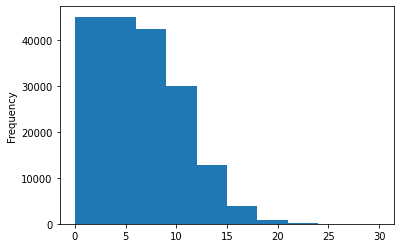

In [ ]:
# Check the distribution of "line_number" column 
train_df.line_number.plot.hist()

In [ ]:
# Use TensorFlow to create one-hot-encoded tensors of our "line_number" column
train_line_numbers_one_hot = tf.one_hot(train_df["line_number"].to_numpy(), depth=15)
val_line_numbers_one_hot = tf.one_hot(val_df["line_number"].to_numpy(), depth=15)
test_line_numbers_one_hot = tf.one_hot(test_df["line_number"].to_numpy(), depth=15)

train_line_numbers_one_hot[:13], train_line_numbers_one_hot.shape

(<tf.Tensor: shape=(13, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
       dtype=float32)>, TensorShape([1

In [ ]:
# How many different total lines are there?
train_df.total_lines.value_counts()

11    24468
10    23639
12    22113
9     19400
13    18438
14    14610
8     12285
15    10768
7      7464
16     7429
17     5202
6      3353
18     3344
19     2480
20     1281
5      1146
21      770
22      759
23      264
4       215
24      200
25      182
26       81
28       58
3        32
30       31
27       28
Name: total_lines, dtype: int64

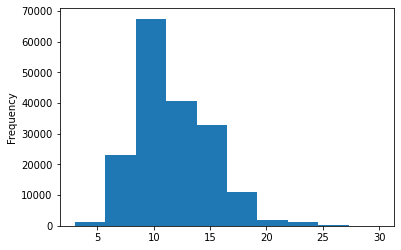

In [ ]:
# Check the distribution of "total_lines" column
train_df.total_lines.plot.hist(); 

In [ ]:
# Check the coverage of a "total_lines" value of 20
np.percentile(train_df["total_lines"].to_list(), 95)

18.0

In [ ]:
# Use TensorFlow to create one-hot-encoded tensors of our "total_lines" column
train_total_lines_one_hot = tf.one_hot(train_df["total_lines"].to_numpy(), depth=20)
val_total_lines_one_hot = tf.one_hot(val_df["total_lines"].to_numpy(), depth=20)
test_total_lines_one_hot = tf.one_hot(test_df["total_lines"].to_numpy(), depth=20)

train_total_lines_one_hot[:10], train_total_lines_one_hot.shape

(<tf.Tensor: shape=(10, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0

### Building a tribrid embedding model

In [ ]:
token_inputs = tf.keras.layers.Input(shape=[], dtype="string", name="token_input")
embedded_tokens = pretrained_embedding_layer(token_inputs)
token_output = tf.keras.layers.Dense(128, activation="relu")(embedded_tokens)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_output,
                             name="token_model")

char_inputs = tf.keras.layers.Input(shape=(1,), dtype="string", name="char_input")
vectorized_characters = char_vectorizer(char_inputs)
embedded_chars = char_embed(vectorized_characters)
char_bi_lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(24))(embedded_chars)
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm,
                            name="char_model")

line_number_inputs = tf.keras.layers.Input(shape=(15,), dtype=tf.float32, name="line_number_input")
line_number_dense_output = tf.keras.layers.Dense(32, activation="relu")(line_number_inputs) 
line_number_model = tf.keras.Model(inputs=line_number_inputs,
                                   outputs=line_number_dense_output,
                                   name="line_number_model")

total_lines_inputs = tf.keras.layers.Input(shape=(20,), dtype=tf.float32, name="total_lines_input")
total_lines_dense_output = tf.keras.layers.Dense(32, activation="relu")(total_lines_inputs) 
total_lines_model = tf.keras.Model(inputs=total_lines_inputs,
                                   outputs=total_lines_dense_output,
                                   name="total_lines_model")

token_char_concat = tf.keras.layers.Concatenate(name="token_char_hybrid")([token_model.output, char_model.output])

hybrid_dense_output = tf.keras.layers.Dense(256, activation="relu")(token_char_concat)
dropout_1 = tf.keras.layers.Dropout(0.5)(hybrid_dense_output)

tribrid_concat = tf.keras.layers.Concatenate(name="tribrid_concat")([line_number_model.output,
                                                                     total_lines_model.output,
                                                                     dropout_1])

dropout_2 = tf.keras.layers.Dropout(0.5)(tribrid_concat)

output_layer = tf.keras.layers.Dense(5, activation="softmax", name="output_layer")(dropout_2)

model_5 = tf.keras.Model(inputs=[line_number_model.input,
                                 total_lines_model.input,
                                 token_model.input,
                                 char_model.input],
                         outputs=output_layer,
                         name="model_5_tribrid_embedding")

In [ ]:
model_5.summary()

Model: "model_5_tribrid_embedding"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
char_input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
token_input (InputLayer)        [(None,)]            0                                            
__________________________________________________________________________________________________
char_vectorizer (TextVectorizat (None, 290)          0           char_input[0][0]                 
__________________________________________________________________________________________________
USE (KerasLayer)                (None, 512)          256797824   token_input[0][0]                
__________________________________________________________________________

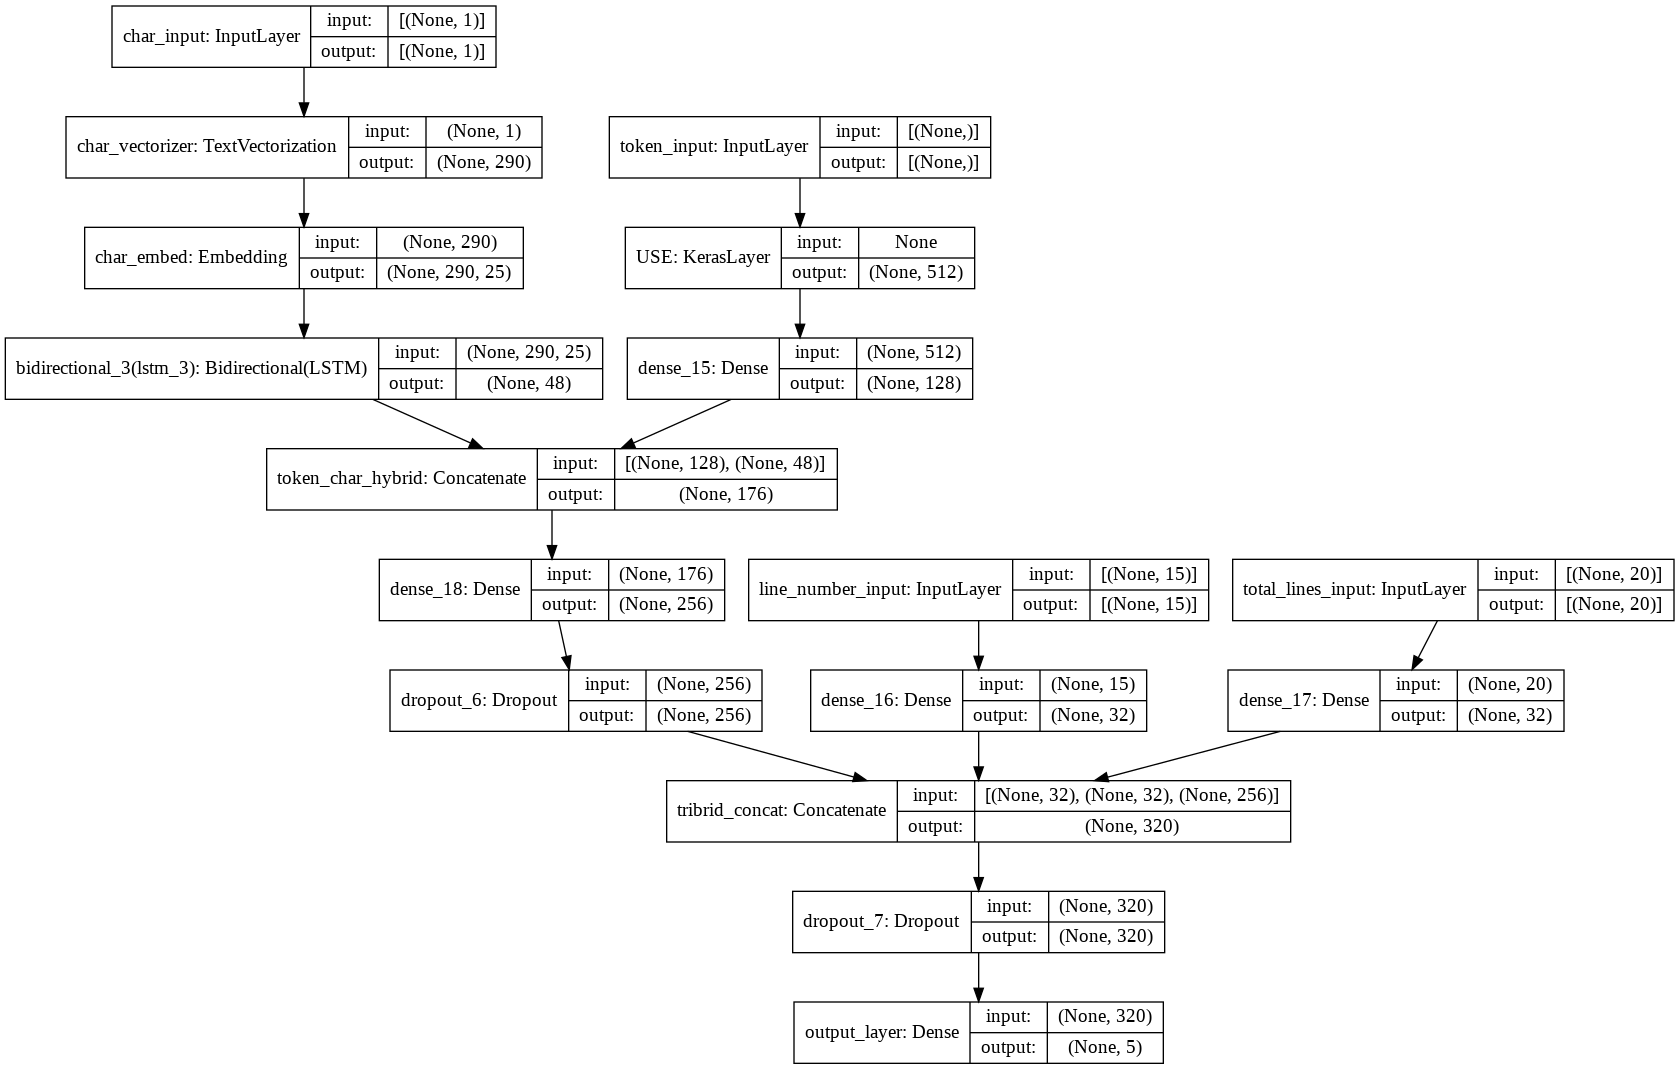

In [ ]:
plot_model(model_5, show_shapes=True)

### What is 'label_smoothing' ?

For example, if our model gets too confident on a single class
(eg. its prediction probability is really high), it may get stuck on that class and not consider other classes...

Really confident = '[0.0, 0.0, 1.0, 0.0, 0.0]'

What 'label_smoothing' does is it assigns some of the value from the highest pred_prob to other classes, in turn, hopefully improving generalization: '[0.01, 0.01, 0.96, 0.01, 0.01]'

For more on label smoothing, see: https://www.pyimagesearch.com/2019/12/30/label-smoothing-with-keras-tensorflow-and-deep-learning/

In [ ]:
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2), # 'label_smoothing' helps to prevent overfitting
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

### Create tribrid embedding datasets using tf.data

In [ ]:
train_char_token_pos_data = tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot,
                                                                train_total_lines_one_hot,
                                                                train_sentences,
                                                                train_chars))
train_char_token_pos_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_char_token_pos_dataset = tf.data.Dataset.zip((train_char_token_pos_data, train_char_token_pos_labels))
train_char_token_pos_dataset = train_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


val_char_token_pos_data = tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot,
                                                              val_total_lines_one_hot,
                                                              val_sentences,
                                                              val_chars))
val_char_token_pos_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_pos_dataset = tf.data.Dataset.zip((val_char_token_pos_data, val_char_token_pos_labels))
val_char_token_pos_dataset = val_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


test_char_token_pos_data = tf.data.Dataset.from_tensor_slices((test_line_numbers_one_hot,
                                                               test_total_lines_one_hot,
                                                               test_sentences,
                                                               test_chars))
test_char_token_pos_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_char_token_pos_dataset = tf.data.Dataset.zip((test_char_token_pos_data, test_char_token_pos_labels))
test_char_token_pos_dataset = test_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
# Check input shapes
train_char_token_pos_dataset, val_char_token_pos_dataset

(<PrefetchDataset shapes: (((None, 15), (None, 20), (None,), (None,)), (None, 5)), types: ((tf.float32, tf.float32, tf.string, tf.string), tf.float64)>,
 <PrefetchDataset shapes: (((None, 15), (None, 20), (None,), (None,)), (None, 5)), types: ((tf.float32, tf.float32, tf.string, tf.string), tf.float64)>)

### Fitting model 5

In [ ]:
model_5_history = model_5.fit(train_char_token_pos_dataset,
                              epochs = 3,
                              steps_per_epoch = int(0.1*len(train_char_token_pos_dataset)),
                              validation_data = val_char_token_pos_dataset,
                              validation_steps = int(0.1*len(val_char_token_pos_dataset)))

Epoch 1/3
562/562 [==============================] - 86s 136ms/step - loss: 1.1396 - accuracy: 0.6960 - val_loss: 1.0007 - val_accuracy: 0.7929
Epoch 2/3
562/562 [==============================] - 74s 132ms/step - loss: 1.0133 - accuracy: 0.7916 - val_loss: 0.9617 - val_accuracy: 0.8225
Epoch 3/3
562/562 [==============================] - 70s 124ms/step - loss: 0.9958 - accuracy: 0.8005 - val_loss: 0.9489 - val_accuracy: 0.8265


In [ ]:
model_5.evaluate(val_char_token_pos_dataset)

945/945 [==============================] - 50s 53ms/step - loss: 0.9487 - accuracy: 0.8251


[0.948716938495636, 0.8251357078552246]

In [ ]:
model_5_pred_probs = model_5.predict(val_char_token_pos_dataset)
model_5_pred_probs[:5]

array([[0.5117159 , 0.10437448, 0.01397931, 0.35049325, 0.01943711],
       [0.50476146, 0.13446164, 0.0415732 , 0.30710226, 0.01210143],
       [0.31552616, 0.10014771, 0.11925615, 0.39548078, 0.06958923],
       [0.06326617, 0.05802852, 0.67838717, 0.05778578, 0.14253241],
       [0.06184185, 0.07317793, 0.6513706 , 0.06116573, 0.15244395]],
      dtype=float32)

In [ ]:
model_5_preds = tf.argmax(model_5_pred_probs, axis=1)
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 3, 2, 2, 4, 4, 4, 4, 1])>

In [ ]:
model_5_results = calculate_results(val_labels_encoded, model_5_preds)
model_5_results

{'accuracy': 82.51357076658282,
 'f1': 0.8242521126760438,
 'precision': 0.8241982626984807,
 'recall': 0.8251357076658281}

In [ ]:
model_4_results

{'accuracy': 73.54031510658017,
 'f1': 0.7324646253311446,
 'precision': 0.734629853812147,
 'recall': 0.7354031510658017}

# Compare model results

In [ ]:
# Combine model results into a dataframe

all_model_results = pd.DataFrame({"model_0_baseline": model_0_results,
                                  "model_1_custom_token_embedding": model_1_results,
                                  "model_2_pretrained_token_embedding": model_2_results,
                                  "model_3_custom_char_embedding": model_3_results,
                                  "model_4_hybrid_char_token_embedding": model_4_results,
                                  "model_5_tribrid_char_token_pos_embedding": model_5_results})

all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
model_0_baseline,72.183238,0.718647,0.721832,0.698925
model_1_custom_token_embedding,78.435721,0.781371,0.784357,0.781845
model_2_pretrained_token_embedding,71.339203,0.713738,0.713392,0.710281
model_3_custom_char_embedding,65.768569,0.651253,0.657686,0.647395
model_4_hybrid_char_token_embedding,73.540315,0.734630,0.735403,0.732465
model_5_tribrid_char_token_pos_embedding,82.513571,0.824198,0.825136,0.824252


In [ ]:
# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100
all_model_results

,accuracy,precision,recall,f1
model_0_baseline,0.721832,0.718647,0.721832,0.698925
model_1_custom_token_embedding,0.784357,0.781371,0.784357,0.781845
model_2_pretrained_token_embedding,0.713392,0.713738,0.713392,0.710281
model_3_custom_char_embedding,0.657686,0.651253,0.657686,0.647395
model_4_hybrid_char_token_embedding,0.735403,0.734630,0.735403,0.732465
model_5_tribrid_char_token_pos_embedding,0.825136,0.824198,0.825136,0.824252


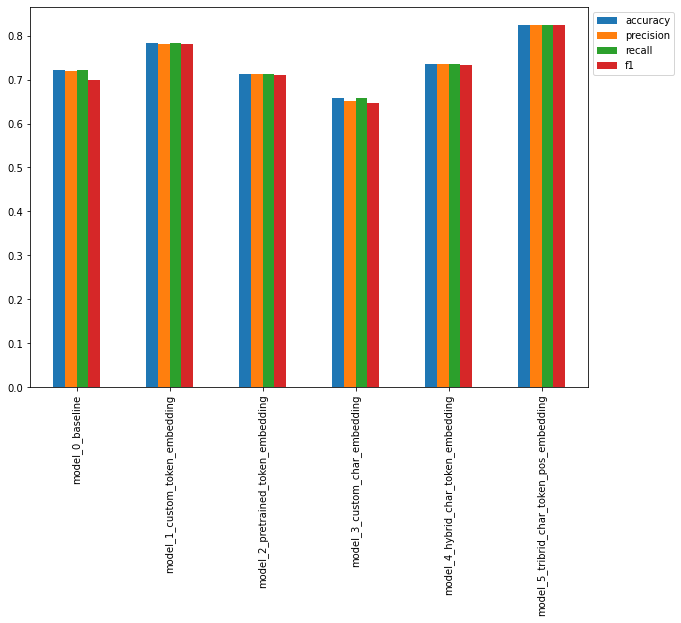

In [ ]:
# Plot and compare all model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0))

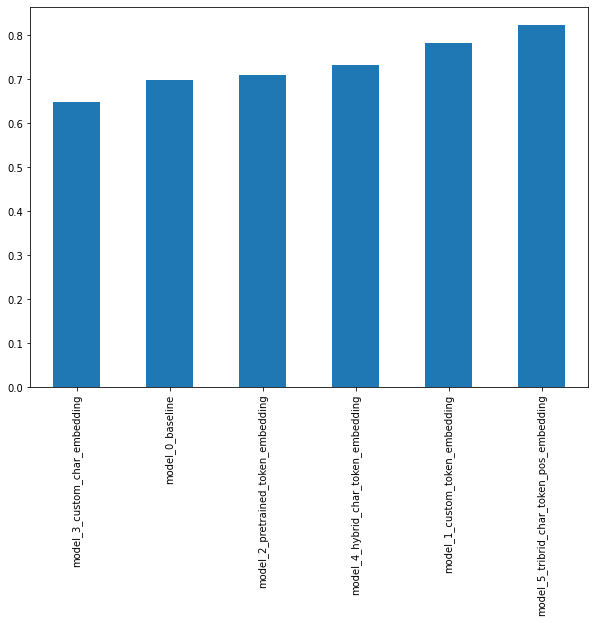

In [ ]:
# Sort models results by f1-score
all_model_results.sort_values("f1", ascending=True)["f1"].plot(kind="bar", figsize=(10, 7))

# Saving and loading model 5

For more, see: https://www.tensorflow.org/tutorials/keras/save_and_load

In [ ]:
model_5.save("skimlit_tribrid_model")

INFO:tensorflow:Assets written to: skimlit_tribrid_model/assets


INFO:tensorflow:Assets written to: skimlit_tribrid_model/assets


In [ ]:
# Load in model_5
loaded_model = tf.keras.models.load_model("skimlit_tribrid_model")

In [ ]:
# Make predictions with the loaded model on the validation set
loaded_pred_probs = loaded_model.predict(val_char_token_pos_dataset)
loaded_preds = tf.argmax(loaded_pred_probs, axis=1)
loaded_preds[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 2, 0, 2, 0, 0, 2, 2, 2])>

In [ ]:
loaded_model_results = calculate_results(val_labels_encoded, loaded_preds)
loaded_model_results

{'accuracy': 21.12736660929432,
 'f1': 0.1840151340971391,
 'precision': 0.18912622509030358,
 'recall': 0.2112736660929432}

In [ ]:
val_labels_encoded[:10]

array([0, 0, 3, 2, 2, 4, 4, 4, 4, 1])

In [ ]:
assert model_5_results == loaded_model_results

In [ ]:
# Check the loaded model summary 
loaded_model.summary()

Model: "model_5_tribrid_embedding"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
char_input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
token_input (InputLayer)        [(None,)]            0                                            
__________________________________________________________________________________________________
char_vectorizer (TextVectorizat (None, None)         0           char_input[0][0]                 
__________________________________________________________________________________________________
USE (KerasLayer)                (None, 512)          256797824   token_input[0][0]                
__________________________________________________________________________